# Practica Machine Learning

## Preparación de datos

In [33]:
#Librerías y dependencias necesarias

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import xgboost as xgb

In [2]:
# Cargamos los datos
df = pd.read_csv('airbnb-listings.csv', sep=";")

In [3]:
df.columns

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

In [4]:
# Eliminamos las colunas que no necesitamos
df= df.drop(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location', 'Country Code',
       'Country', 'Latitude', 'Longitude',
       'Amenities', 'Security Deposit', 'Cleaning Fee', 'Calendar Updated',
       'Has Availability', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Calendar last Scraped', 'First Review', 'Last Review', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'License', 'Jurisdiction Names', 'Geolocation', 'Features', 'Street', 'Property Type',
       'Bed Type', 'Cancellation Policy', 'Zipcode', 'Monthly Price'], axis=1)

In [5]:
# Pasamos la columna 'Square Feet' a metros cuadrados
df['Square Meters'] = df['Square Feet'] * 0.092903
df = df.drop('Square Feet', axis=1)

In [6]:
# Identificamos la variable objetivo
X = df.drop('Price', axis=1)
y = df['Price']


## Análisis exploratorio

In [7]:
df.head().T

,0,1,2,3,4
Neighbourhood,NaN,NaN,NaN,Embajadores,Embajadores
Room Type,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt,Entire home/apt
Accommodates,2,4,4,2,5
Bathrooms,1.0,1.0,1.5,1.0,1.0
Bedrooms,0.0,1.0,1.0,1.0,2.0
Beds,1.0,2.0,2.0,2.0,4.0
Price,50.0,50.0,77.0,50.0,95.0
Weekly Price,NaN,NaN,NaN,300.0,590.0
Guests Included,2,2,1,1,4
Extra People,15,25,0,20,0


In [8]:
df.describe()

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Weekly Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Calculated host listings count,Reviews per Month,Square Meters
count,14780.000000,14725.000000,14755.000000,14731.00000,14763.000000,3590.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,14776.000000,11618.000000,598.000000
mean,3.277808,1.281732,1.343816,2.04426,73.561471,376.937883,1.589986,7.690460,3.050474,945.168742,22.632273,91.697978,9.486871,1.870014,36.274582
std,2.097291,0.658517,0.900078,1.61277,72.062050,195.701043,1.182550,12.971352,12.266517,8439.321218,38.290244,8.989101,23.626014,1.867550,59.191746
min,1.000000,0.000000,0.000000,1.00000,9.000000,70.000000,0.000000,0.000000,1.000000,1.000000,0.000000,20.000000,1.000000,0.020000,0.000000
25%,2.000000,1.000000,1.000000,1.00000,34.000000,215.000000,1.000000,0.000000,1.000000,365.000000,1.000000,89.000000,1.000000,0.450000,0.000000
50%,3.000000,1.000000,1.000000,2.00000,55.000000,350.000000,1.000000,0.000000,2.000000,1125.000000,7.000000,94.000000,2.000000,1.200000,9.150945
75%,4.000000,1.000000,2.000000,2.00000,86.000000,500.000000,2.000000,15.000000,3.000000,1125.000000,27.000000,98.000000,5.000000,2.780000,60.015338
max,16.000000,8.000000,10.000000,16.00000,999.000000,999.000000,16.000000,500.000000,1125.000000,1000000.000000,446.000000,100.000000,145.000000,17.210000,650.042291


In [9]:
df.head()

,Neighbourhood,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Weekly Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Calculated host listings count,Reviews per Month,Square Meters
0,NaN,Entire home/apt,2,1.0,0.0,1.0,50.0,NaN,2,15,2,1125,30,96.0,2.0,5.11,NaN
1,NaN,Entire home/apt,4,1.0,1.0,2.0,50.0,NaN,2,25,1,1125,97,81.0,13.0,5.88,NaN
2,NaN,Entire home/apt,4,1.5,1.0,2.0,77.0,NaN,1,0,1,1125,7,89.0,1.0,6.18,NaN
3,Embajadores,Entire home/apt,2,1.0,1.0,2.0,50.0,300.0,1,20,7,1125,6,93.0,3.0,0.19,NaN
4,Embajadores,Entire home/apt,5,1.0,2.0,4.0,95.0,590.0,4,0,4,1125,72,97.0,1.0,1.39,NaN


In [10]:
df.dtypes

Neighbourhood                      object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Price                             float64
Weekly Price                      float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Maximum Nights                      int64
Number of Reviews                   int64
Review Scores Rating              float64
Calculated host listings count    float64
Reviews per Month                 float64
Square Meters                     float64
dtype: object

In [11]:
df.columns

Index(['Neighbourhood', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Weekly Price', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Number of Reviews',
       'Review Scores Rating', 'Calculated host listings count',
       'Reviews per Month', 'Square Meters'],
      dtype='object')

### Outlier

<AxesSubplot:ylabel='Frequency'>

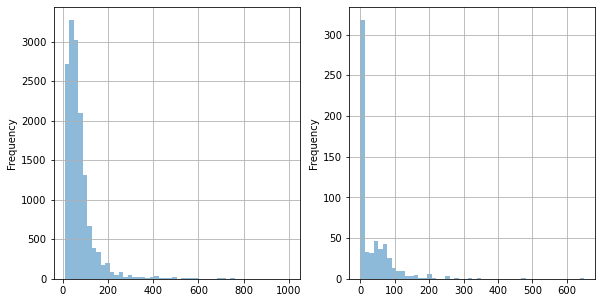

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,2)
df['Price'].plot.hist(alpha=0.5, bins=50, grid = True)

plt.subplot(1,3,3)
df['Square Meters'].plot.hist(alpha=0.5, bins=50, grid = True)


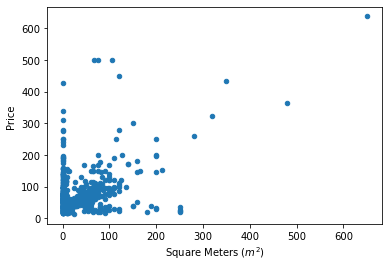

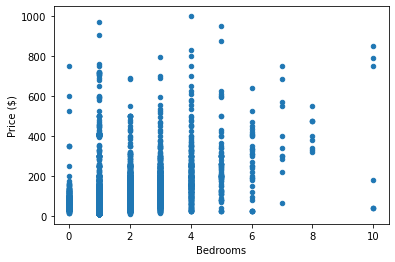

In [13]:
df.plot(kind = 'scatter',x='Square Meters',y = 'Price')
plt.xlabel('Square Meters ($m^2$)')
plt.ylabel('Price ')
plt.show()

df.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price ($)')
plt.show()

In [14]:
# Eliminar los valores entre 20 y 250 de la columna 'Square Meters'
X = X.drop(df[(df['Square Meters'] >= 20) & (df['Square Meters'] <= 250)].index)

### Correlación

In [15]:
df.corr()

,Accommodates,Bathrooms,Bedrooms,Beds,Price,Weekly Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Calculated host listings count,Reviews per Month,Square Meters
Accommodates,1.000000,0.431925,0.723677,0.838797,0.522288,0.549395,0.569527,0.225316,0.007627,0.002564,0.053389,-0.056598,0.254818,0.018831,0.413238
Bathrooms,0.431925,1.000000,0.526088,0.479792,0.387034,0.083324,0.246197,0.089529,0.033094,-0.002244,-0.077383,0.011814,0.286902,-0.088332,0.491556
Bedrooms,0.723677,0.526088,1.000000,0.731991,0.498069,0.352908,0.442655,0.128277,0.023183,0.000876,-0.049008,0.010028,0.219958,-0.073867,0.429108
Beds,0.838797,0.479792,0.731991,1.000000,0.442412,0.347814,0.465412,0.162132,0.009431,0.002158,0.012855,-0.045070,0.219272,-0.038513,0.370556
Price,0.522288,0.387034,0.498069,0.442412,1.000000,0.845144,0.302348,0.140037,0.027424,0.001530,-0.058546,0.065312,0.222132,-0.089877,0.421768
Weekly Price,0.549395,0.083324,0.352908,0.347814,0.845144,1.000000,0.407495,0.123716,0.005913,-0.012258,0.071632,0.014404,0.119691,0.028533,0.071578
Guests Included,0.569527,0.246197,0.442655,0.465412,0.302348,0.407495,1.000000,0.315282,0.002486,-0.003833,0.095069,0.010948,0.096108,0.060020,0.208808
Extra People,0.225316,0.089529,0.128277,0.162132,0.140037,0.123716,0.315282,1.000000,-0.017631,-0.002519,0.060681,0.028473,0.013131,-0.004822,0.151955
Minimum Nights,0.007627,0.033094,0.023183,0.009431,0.027424,0.005913,0.002486,-0.017631,1.000000,-0.001154,-0.038998,0.000439,0.030271,-0.058933,0.025092
Maximum Nights,0.002564,-0.002244,0.000876,0.002158,0.001530,-0.012258,-0.003833,-0.002519,-0.001154,1.000000,-0.002619,0.000331,0.006565,-0.004832,-0.022857


C:\Users\34697\AppData\Local\Temp\ipykernel_19808\2931170248.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


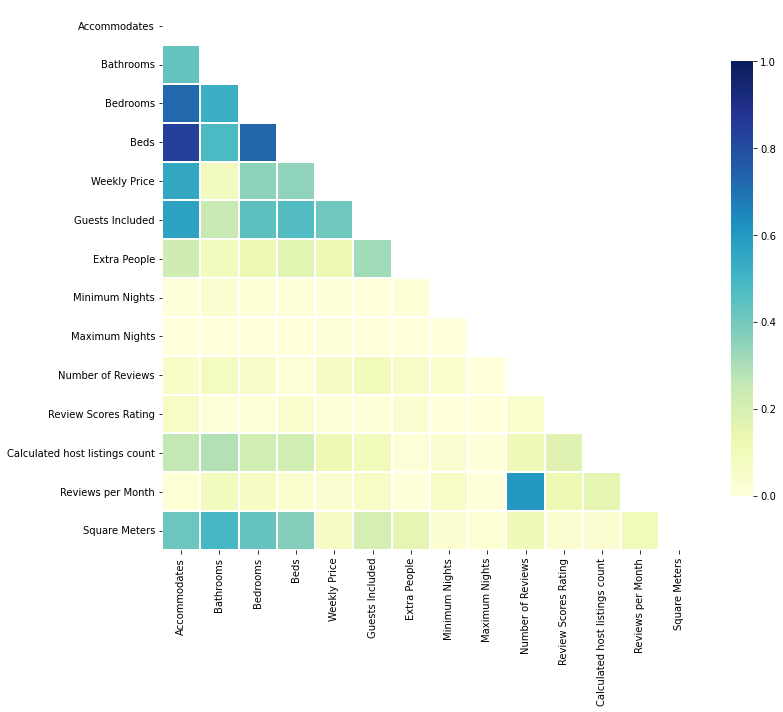

In [16]:
# Compute the correlation matrix
corr = np.abs(df.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

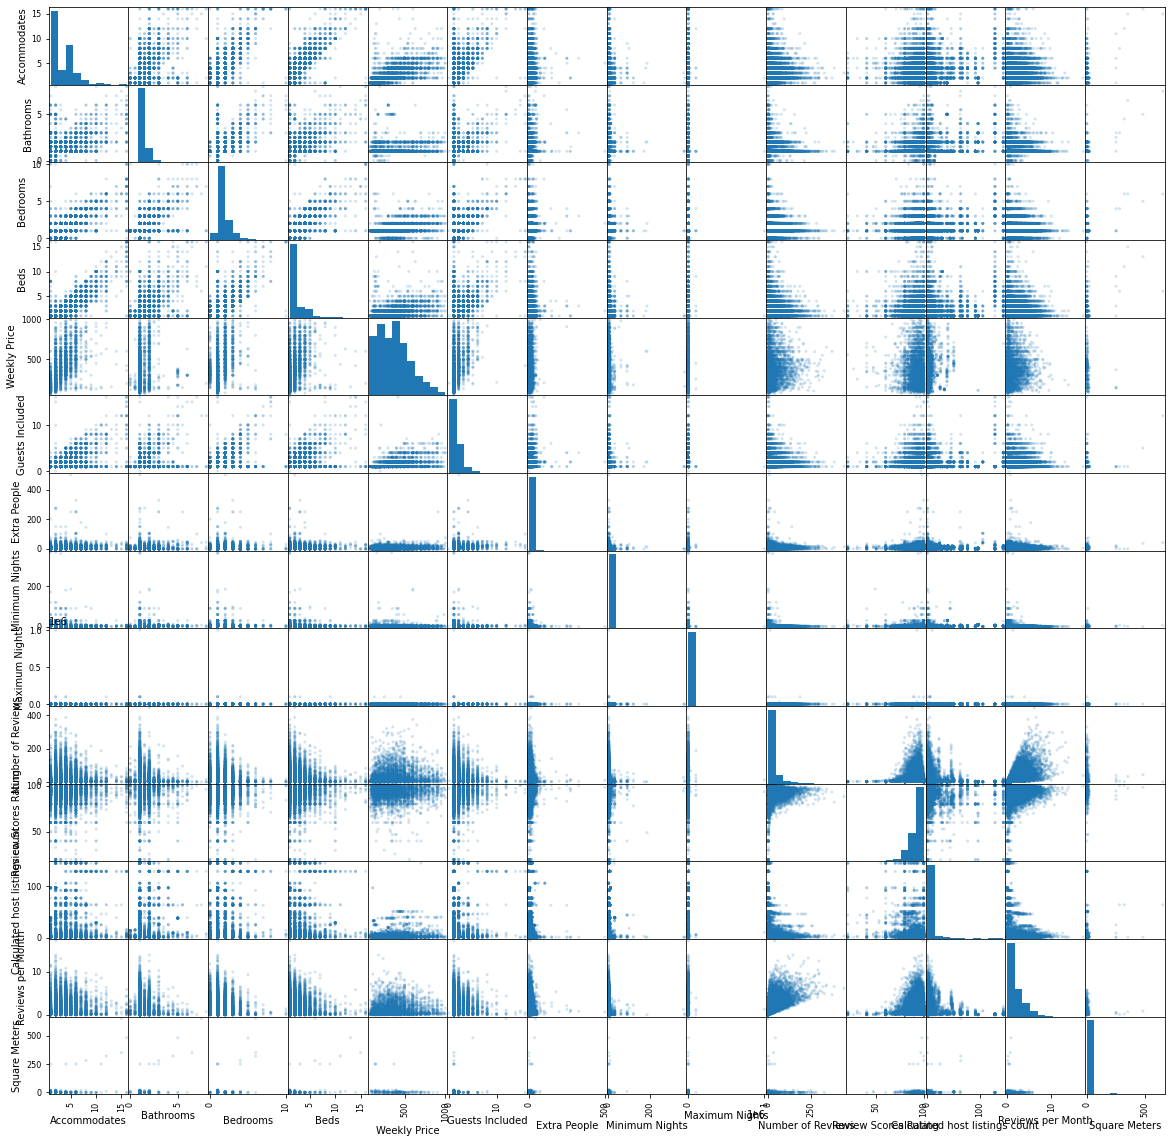

In [17]:
pd.plotting.scatter_matrix(X, alpha=0.2, figsize=(20, 20), diagonal = 'hist')
plt.show()

In [18]:
# Eliminamos las variables con una alta correlación

X = X.drop(['Reviews per Month', 'Weekly Price', 'Accommodates', 'Beds'], axis=1)

## Preprocesamiento

In [19]:
# Codificación de la varieble categorica 'Room Type'
# Creamos las variables binarias
dummies = pd.get_dummies(df['Room Type'], drop_first = False)
dummies.head()

# Añadimos las variables binarias al DataFrame
X = pd.concat([X, dummies], axis = 1)

# Eliminamos la vairable original race
X = X.drop(columns=['Room Type'])

In [20]:
# Codificación de la varieble categorica 'Neighbourhood'
# Crear una instancia de LabelEncoder
label_encoder = LabelEncoder()

# Ajustar y transformar los valores de la columna "Neighbourhood"
encoded_neighbourhood = label_encoder.fit_transform(X['Neighbourhood'])

# Asignar los valores codificados al DataFrame original
X['Neighbourhood'] = encoded_neighbourhood

In [21]:
X.dtypes

Neighbourhood                       int32
Bathrooms                         float64
Bedrooms                          float64
Guests Included                   float64
Extra People                      float64
Minimum Nights                    float64
Maximum Nights                    float64
Number of Reviews                 float64
Review Scores Rating              float64
Calculated host listings count    float64
Square Meters                     float64
Entire home/apt                     uint8
Private room                        uint8
Shared room                         uint8
dtype: object

In [22]:

from sklearn.impute import SimpleImputer
# Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
# Lista de columnas a imputar
columns_to_impute = ['Bathrooms', 'Bedrooms', 'Guests Included', 'Extra People', 'Minimum Nights',
                     'Maximum Nights', 'Number of Reviews', 'Review Scores Rating',
                     'Calculated host listings count', 'Square Meters']

# Imputar los valores faltantes en cada columna
for column in columns_to_impute:
    X[column] = imputer.fit_transform(X[[column]])


In [23]:
from sklearn.preprocessing import StandardScaler
# Escalar características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [24]:
X_scaled.describe

<bound method NDFrame.describe of        Neighbourhood  Bathrooms      Bedrooms  Guests Included  Extra People  \
0           1.049566  -0.430538 -1.506911e+00         0.359983  5.782535e-01   
1           1.049566  -0.430538 -3.824234e-01         0.359983  1.362880e+00   
2           1.049566   0.336098 -3.824234e-01        -0.502730 -5.986856e-01   
3          -1.099326  -0.430538 -3.824234e-01        -0.502730  9.705665e-01   
4          -1.099326  -0.430538  7.420641e-01         2.085410 -5.986856e-01   
...              ...        ...           ...              ...           ...   
14775       1.049566   0.000000 -2.496864e-16         0.000000 -6.968879e-17   
14776       1.049566   0.000000 -2.496864e-16         0.000000 -6.968879e-17   
14777       1.049566   0.000000 -2.496864e-16         0.000000 -6.968879e-17   
14778       1.049566   0.000000 -2.496864e-16         0.000000 -6.968879e-17   
14779       1.049566   0.000000 -2.496864e-16         0.000000 -6.968879e-17   

     

In [25]:
import numpy as np
from sklearn.feature_selection import f_regression, mutual_info_regression

# convertimos el DataFrame al formato necesario para scikit-learn
data = X.values 

dy = data[:,0:1]     # nos quedamos con la 1ª columna, price
dX = data[:,1:]      # nos quedamos con el resto

X_train, X_test, y_train, y_test = train_test_split(dX, dy.ravel(), test_size=0.2, random_state=42, shuffle = True)

feature_names = X.columns[1:]

f_test, _ = f_regression(dX, dy.ravel())
f_test /= np.max(f_test)

mi = mutual_info_regression(dX, dy.ravel())
mi /= np.max(mi)



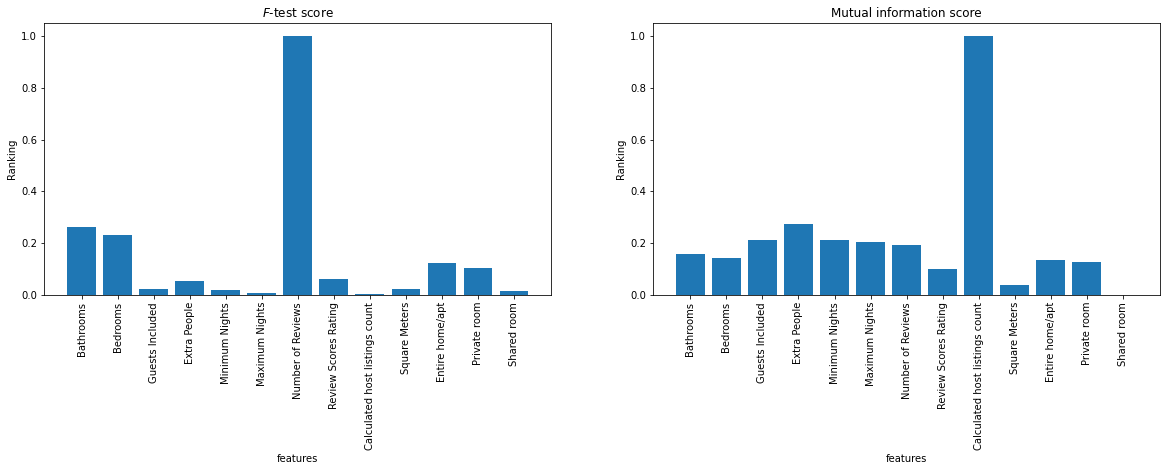

In [26]:

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(range(len(feature_names)), f_test, align="center")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F$-test score')

plt.subplot(1, 2, 2)
plt.bar(range(len(feature_names)), mi, align="center")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

## Modelado

In [36]:
# Crear una instancia del modelo Lasso
lasso = Lasso(alpha=0.1)

# Ajustar el modelo Lasso a los datos de entrenamiento
lasso.fit(X_train, y_train)

# Obtener los coeficientes seleccionados por Lasso
lasso_coefs = lasso.coef_

# Obtener el índice de los coeficientes no nulos
selected_features = lasso_coefs != 0

# Filtrar las características seleccionadas en los conjuntos de entrenamiento y prueba
X_train = X_train[:, selected_features]
X_test = X_test[:, selected_features]

In [37]:
# Entrenar y evaluar modelos utilizando validación cruzada
models = [
    LinearRegression(),
    xgb.XGBRegressor(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
]

for model in models:
    # Entrenar con validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse_scores = -cv_scores
    average_cv_rmse = cv_rmse_scores.mean()
    
    print(f"Modelo: {model.__class__.__name__}")
    print(f"RMSE promedio (validación cruzada): {average_cv_rmse}")
    
    # Entrenar con conjunto de entrenamiento y evaluar con conjunto de prueba
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    print(f"RMSE (conjunto de prueba): {test_rmse}\n")
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"R^2: {r2}")
    print()

Modelo: LinearRegression
RMSE promedio (validación cruzada): 16970.14177899315
RMSE (conjunto de prueba): 129.45431267919403

MSE: 16758.419071242537
MAE: 115.0680651473845
R^2: 0.013166761759392354

Modelo: XGBRegressor
RMSE promedio (validación cruzada): 16268.829745023462
RMSE (conjunto de prueba): 127.67780188929257

MSE: 16301.621095281442
MAE: 108.42808737096671
R^2: 0.04006568485727491

Modelo: DecisionTreeRegressor
RMSE promedio (validación cruzada): 28283.830707566267
RMSE (conjunto de prueba): 166.86839914490002

MSE: 27845.062633181667
MAE: 125.75811442694987
R^2: -0.6396793283722226

Modelo: RandomForestRegressor
RMSE promedio (validación cruzada): 16562.799086692095
RMSE (conjunto de prueba): 129.7512580924756

MSE: 16835.38897658022
MAE: 108.04306345795614
R^2: 0.008634325817281185

